### Adapted from, Iterated Local Search algorithm in the Ruby Programming Language  
  
The Clever Algorithms Project: http://www.CleverAlgorithms.com  
(c) Copyright 2010 Jason Brownlee. Some Rights Reserved.   
This work is licensed under a Creative Commons Attribution-Noncommercial-Share Alike 2.5 Australia License.  
  
Iterated Local Search, ILS  

In [1]:
from random import seed, shuffle, randrange
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import linspace

In [2]:
# set seed for reproducibility
seed(1)

In [3]:
def random_permutation(cities):
    perm = list(range(len(cities)))
    shuffle(perm)
    return perm

In [4]:
def euc_2d(c1, c2):
    distance = round(sqrt((c2[0]-c1[0])**2 + (c2[1]-c1[1])**2))
    return distance

In [5]:
def cost(permutation, cities):
    distance = 0
    size = len(permutation)
    for i in range(size):
        city_1 = permutation[i]
        city_2 = permutation[i+1] if i != size-1 else permutation[0]
        distance += euc_2d(cities[city_1], cities[city_2])
    # end for
    return distance

In [6]:
def plot_route(paths, cities):
    f,ax = plt.subplots(nrows=len(paths), ncols=1, figsize=(10, 50))
    # Select the color map
    cmap = cm.get_cmap(name='RdYlGn')
    colors = cm.RdYlGn(linspace(0, 1, len(paths)))
    
    x_coord=[city[0] for city in cities]
    y_coord=[city[1] for city in cities]

    for path_idx,path in enumerate(paths):
        x_path = list()
        y_path = list()
        for i in range(len(path)):
            x_path += [cities[path[i]][0]]
            y_path += [cities[path[i]][1]]
        # end for
        ax[path_idx].plot(x_path,y_path,'-o', color = colors[path_idx])
        ax[path_idx].set_xlabel('X-cooridnates of cities')
        ax[path_idx].set_ylabel('Y-cooridnates of cities')
        ax[path_idx].set_title('Map of path')
        for city_idx, city in enumerate(cities):
            ax[path_idx].text(x_coord[city_idx], y_coord[city_idx], str(city_idx))
    # end for
    plt.show()
    return None

In [7]:
class IteratedLocalSearch:
    def __init__(self):
        self.best_paths = list()
        pass

    @staticmethod
    def stochastic_two_opt(permutation):
        size = len(permutation)
        c1, c2 = randrange(size), randrange(size)
        exclude = [c1]
        if c1 == 0:
            exclude += [size-1]
        else:
            exclude += [c1-1]
        # end if
        if c1 == size-1:
            exclude += [0]
        else:
            exclude += [c1+1]
        # end if
        while c2 in exclude:
            c2 = randrange(size)
        # end while
        if c1 > c2:
            c1, c2 = c2, c1
        # end if
        new_permutation = list(permutation)
        new_permutation[c1:c2] = reversed(new_permutation[c1:c2])
        return new_permutation

    @staticmethod
    def local_search(best, cities, max_no_improv):
        count = 0
        while count < max_no_improv:
            candidate = dict()
            candidate['vector'] = IteratedLocalSearch.stochastic_two_opt(best['vector'])
            candidate['cost'] = cost(candidate['vector'], cities)
            if candidate['cost'] < best['cost']:
                best = candidate
                count = 0
            else:
                count += 1
            # end if
        # end while
        return best

    @staticmethod
    def double_bridge_move(perm):
        size = round(len(perm)/4)
        pos1 = 1 + randrange(size)
        pos2 = pos1 + 1 + randrange(size)
        pos3 = pos2 + 1 + randrange(size)
        p1 = perm[0:pos1] + perm[pos3:]
        p2 = perm[pos2:pos3] + perm[pos1:pos2]
        return p1+p2

    @staticmethod
    def perturbation(cities, best):
        candidate = dict()
        candidate['vector'] = IteratedLocalSearch.double_bridge_move(best['vector'])
        candidate['cost'] = cost(candidate['vector'], cities)
        return candidate

    # @staticmethod
    def search(self, cities, max_iterations, max_no_improv):
        best = dict()
        best['vector'] = random_permutation(cities)
        best['cost'] = cost(best['vector'], cities)
        # plot_route(best['vector'], cities)
        self.best_paths.append(best['vector'])
        best = IteratedLocalSearch.local_search(best, cities, max_no_improv)
        for _ in range(0, max_iterations):
            candidate = IteratedLocalSearch.perturbation(cities, best)
            candidate = IteratedLocalSearch.local_search(candidate, cities, max_no_improv)
            if candidate['cost'] < best['cost']:
                best = candidate
                self.best_paths.append(best['vector'])
            # end if
            print(' > iteration={}, best={}'.format(_+1, best["cost"]))
        # end for
        return best

In [8]:
def main():
    # problem configuration
    berlin52 = [[565, 575], [25, 185], [345, 750], [945, 685], [845, 655], [880, 660], [25, 230], [525, 1000],
                [580, 1175], [650, 1130], [1605, 620], [1220, 580], [1465, 200], [1530, 5], [845, 680], [725, 370],
                [145, 665], [415, 635], [510, 875], [560, 365], [300, 465], [520, 585], [480, 415], [835, 625],
                [975, 580], [1215, 245], [1320, 315], [1250, 400], [660, 180], [410, 250], [420, 555], [575, 665],
                [1150, 1160], [700, 580], [685, 595], [685, 610], [770, 610], [795, 645], [720, 635], [760, 650],
                [475, 960], [95, 260], [875, 920], [700, 500], [555, 815], [830, 485], [1170, 65], [830, 610],
                [605, 625], [595, 360], [1340, 725], [1740, 245]]
    # algorithm configuration
    max_iterations = 100
    max_no_improv = 50
    iterated_local_search = IteratedLocalSearch()
    # execute the algorithm
    best = iterated_local_search.search(berlin52, max_iterations, max_no_improv)
    print('Done. Best Solution: c={}, v={}'.format(best['cost'], best['vector']))
    plot_route(iterated_local_search.best_paths,berlin52)
    return None

 > iteration=1, best=11960
 > iteration=2, best=11518
 > iteration=3, best=11518
 > iteration=4, best=11518
 > iteration=5, best=10963
 > iteration=6, best=10511
 > iteration=7, best=10511
 > iteration=8, best=10462
 > iteration=9, best=10462
 > iteration=10, best=10462
 > iteration=11, best=10462
 > iteration=12, best=9425
 > iteration=13, best=9425
 > iteration=14, best=9425
 > iteration=15, best=9425
 > iteration=16, best=9425
 > iteration=17, best=9425
 > iteration=18, best=9425
 > iteration=19, best=9425
 > iteration=20, best=9425
 > iteration=21, best=9425
 > iteration=22, best=9425
 > iteration=23, best=9425
 > iteration=24, best=9425
 > iteration=25, best=9425
 > iteration=26, best=9287
 > iteration=27, best=9287
 > iteration=28, best=9287
 > iteration=29, best=9287
 > iteration=30, best=9287
 > iteration=31, best=9287
 > iteration=32, best=9287
 > iteration=33, best=9287
 > iteration=34, best=9287
 > iteration=35, best=9287
 > iteration=36, best=9287
 > iteration=37, best=9287

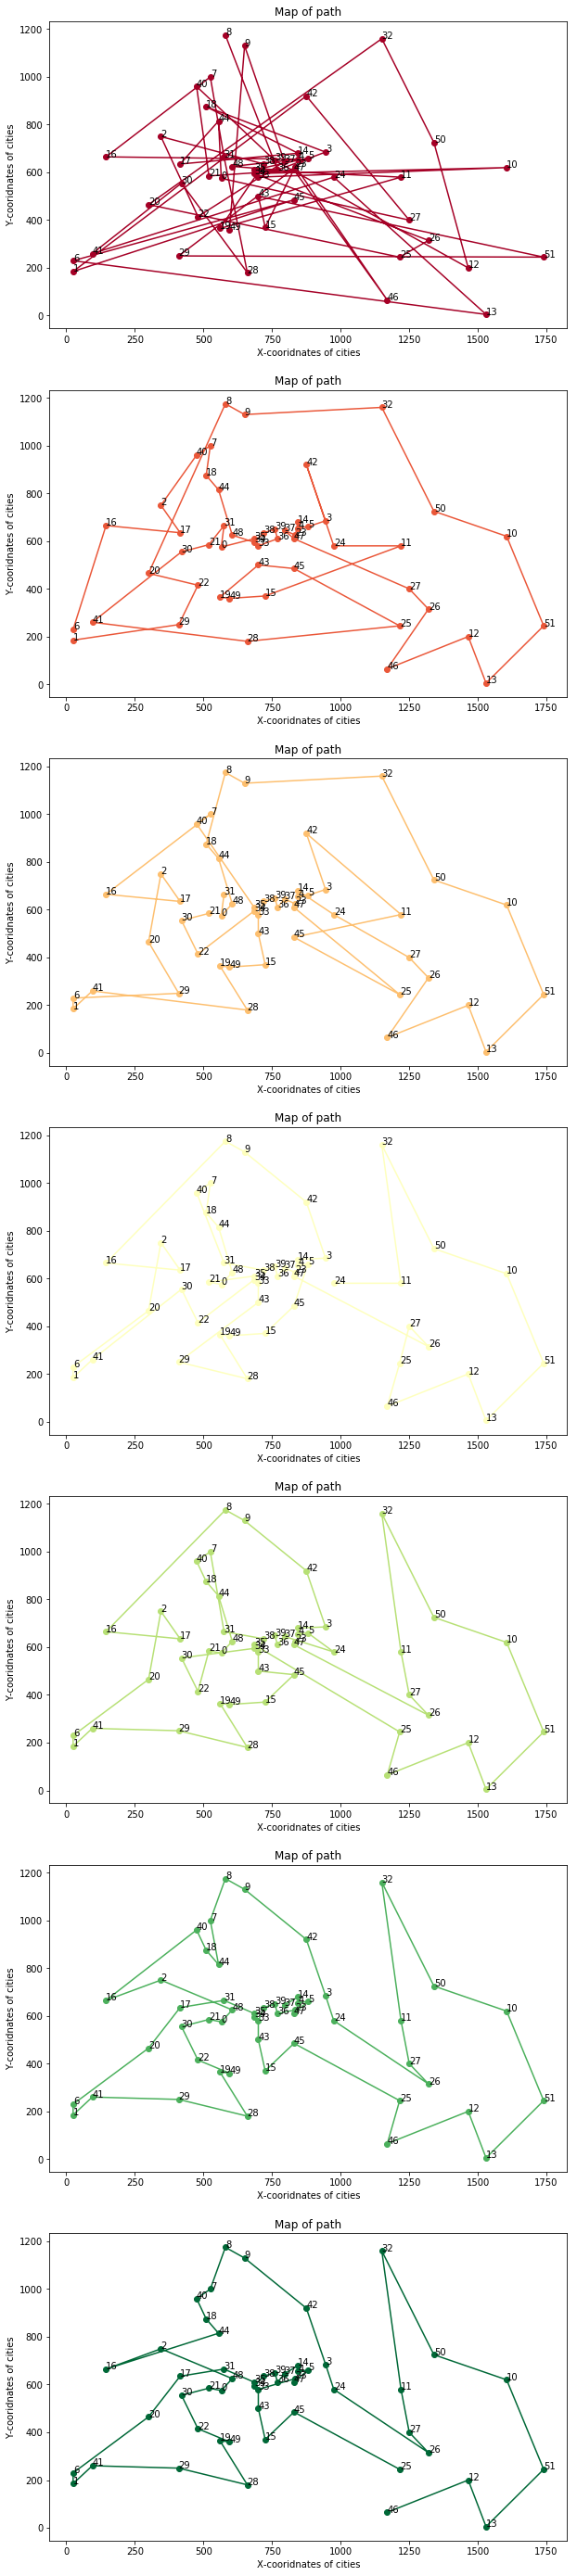

In [9]:
if __name__ == '__main__':
    main()